In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, Input

In [2]:
# Load files
data_0_500 = pd.read_csv('data/prices0to500.csv')
data_0_250 = pd.read_csv('data/prices0to250.csv')
data_250_500 = data_0_500[250:500]

data_0_250.columns = [int(i) for i in data_0_250.columns]
data_250_500.columns = [int(i) for i in data_250_500.columns]
data_0_500.columns = [int(i) for i in data_0_500.columns]

In [11]:
# Testing on all data, one model.

# Normalize data
scaler = StandardScaler()
data_scaled_full = scaler.fit_transform(data_0_500.values)

# Splitting the scaled data into training and testing datasets
data_train = data_scaled_full[:250].T
data_test = data_scaled_full[250:].T

In [12]:
model = Sequential([
    Input(shape=(250, 1)),
    LSTM(250, return_sequences=True, activation='sigmoid'),
    # Dropout(0.2),
    Dense(1),
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(data_train, data_test, epochs=100, batch_size=32)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 181ms/step - loss: 1.1034
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - loss: 1.1406
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - loss: 1.1205
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - loss: 1.1512
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - loss: 1.0282
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - loss: 1.0656
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - loss: 1.0865
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - loss: 0.9926
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - loss: 1.0238
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - loss: 1.0205
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - loss: 0.9723
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - loss: 0.9812
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - loss: 0.9522
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - loss: 0.9544
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - loss: 0.9767
Epoc

In [13]:
# Predict
predictions = model.predict(data_train).squeeze()
predictions_transposed = pd.DataFrame(predictions.T)
predictions_transposed.index = [i for i in range(250, 500)]
predictions_transposed.columns = [i for i in range(50)]
# predictions_transposed.head(2)

data_train_t = pd.DataFrame(data_train.T)
data_train_t.head()
data_train_t.head(2)

predicted_full = pd.concat([data_train_t, predictions_transposed], axis='rows')
# print(predicted_full.shape)
# predicted_full.head(2)

data_scaled_full = pd.DataFrame(data_scaled_full)
data_scaled_full.index = [i for i in range(500)]
data_scaled_full.columns = [i for i in range(50)]
# data_scaled_full.head(2)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


In [14]:
predicted_full

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-0.515538,0.670101,1.950758,1.227271,-1.960603,1.982375,2.680726,0.732795,1.627832,-0.070253,...,1.283144,-0.957301,2.084182,-1.003912,0.119468,0.209860,-1.806259,2.043383,2.027493,-0.028567
1,-0.488799,0.785359,2.048506,1.217512,-1.983695,1.903666,2.580549,0.835538,2.037908,-0.079615,...,1.127392,-0.930466,2.062889,-0.545081,0.074608,0.156912,-1.834870,2.100377,1.985510,-0.037064
2,-0.502169,0.849392,1.983340,1.276064,-2.133795,1.651796,2.680726,0.946184,1.815784,-0.266872,...,1.075474,-0.883187,2.126767,-0.951172,0.234822,0.037778,-1.773247,2.237162,1.912040,-0.190011
3,-0.421954,0.890372,1.885592,1.339496,-2.214618,1.447151,2.613941,1.546836,1.713265,-0.160760,...,1.218247,-0.885742,2.020303,-1.114664,0.266864,-0.081355,-1.786452,2.259960,2.027493,0.013918
4,-0.274895,0.757185,1.853010,1.290703,-2.035653,1.384184,2.380196,1.657482,1.952476,-0.226300,...,1.283144,-0.885742,1.977718,-0.966994,0.324541,-0.028407,-1.705021,2.271358,1.801836,-0.190011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.691078,-0.083751,0.064132,-0.128483,-0.270478,-0.398049,-0.172484,-0.204384,0.484827,-0.004966,...,0.078622,-0.316993,-0.040745,0.269993,-0.216309,-0.103482,0.254259,0.513199,-0.329056,0.546760
496,-0.719349,-0.079818,0.072501,-0.133406,-0.291899,-0.374537,-0.174321,-0.215770,0.499912,0.005191,...,0.064071,-0.329140,-0.045915,0.330702,-0.199601,-0.161610,0.232204,0.500956,-0.360358,0.532550
497,-0.720445,-0.081500,0.083574,-0.134736,-0.314790,-0.360738,-0.169257,-0.191703,0.509347,0.008182,...,0.049991,-0.340958,-0.062707,0.347626,-0.207755,-0.199471,0.237141,0.497702,-0.353027,0.555092
498,-0.711956,-0.068078,0.079024,-0.132135,-0.357581,-0.327279,-0.168425,-0.164849,0.479085,-0.014492,...,0.013002,-0.353728,-0.053733,0.378491,-0.200207,-0.192496,0.222634,0.505110,-0.361354,0.522083


Text(0.5, 1.0, 'Stock Price Prediction')

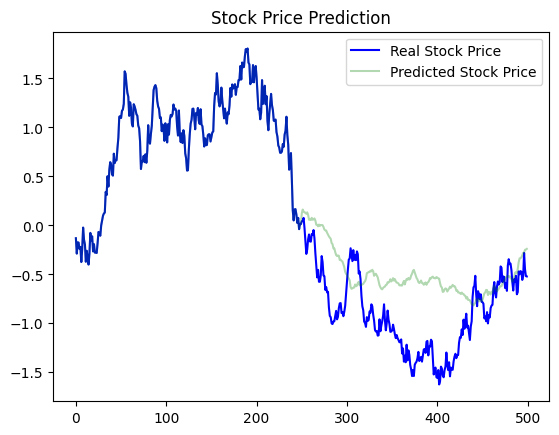

In [15]:
stock_number = 10
plt.plot(data_scaled_full[stock_number], color='blue', label='Real Stock Price')
plt.plot(predicted_full[stock_number], color='green', label='Predicted Stock Price', alpha = 0.3)
plt.legend()
plt.title('Stock Price Prediction')

In [16]:
# The journey to find similar stocks, as similar stocks works well with one model.

statistical_data = pd.DataFrame()
statistical_data.index = ['mean', 'variance', 'std', 'skewness', 'kurtosis', 'median', 'min', 'max', '25%', '50%', '75%']
for i in range(50):
    avg = data_0_500[i].mean()
    std = data_0_500[i].std()
    statistical_data[i] = [avg, std, std**2, data_0_500[i].skew(), data_0_500[i].kurt(), data_0_500[i].median(), data_0_500[i].min(), data_0_500[i].max(), data_0_500[i].quantile(0.25), data_0_500[i].quantile(0.5), data_0_500[i].quantile(0.75)]

In [17]:
statistical_data

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
mean,13.845620,69.033740,47.262580,48.004780,55.496120,11.740700,18.177200,46.782800,68.537300,50.185100,...,31.651400,63.251640,12.502360,60.843540,36.523580,52.461460,57.537160,34.427360,41.273040,56.123620
variance,0.748745,3.908187,0.614438,2.051494,1.733916,0.635884,0.299771,1.266560,0.585843,3.207362,...,0.771223,7.833634,0.940225,1.898022,1.561982,0.756214,4.548284,0.878169,3.814908,1.178059
std,0.560619,15.273926,0.377534,4.208629,3.006465,0.404349,0.089863,1.604175,0.343212,10.287172,...,0.594784,61.365825,0.884024,3.602488,2.439787,0.571859,20.686886,0.771180,14.553524,1.387822
skewness,0.430390,-0.105479,0.607391,0.037878,-0.294379,-0.953175,0.503840,0.616619,0.139749,0.774150,...,0.088064,-0.022540,0.588317,0.289168,-1.100800,0.019868,0.500165,0.284235,-0.486265,-0.007155
kurtosis,-1.148061,-1.456631,-0.940508,-1.491674,-0.716192,0.364842,-0.435913,0.641224,-0.497690,-0.120372,...,-1.145991,-1.378724,-0.771744,-0.415863,0.892211,0.155982,-1.155711,-0.521551,0.289093,-0.587280
median,13.590000,68.255000,46.975000,47.830000,55.880000,11.850000,18.100000,46.690000,68.550000,49.535000,...,31.590000,64.615000,12.210000,60.750000,36.825000,52.375000,55.425000,34.350000,41.665000,56.100000
min,12.630000,62.470000,46.330000,44.900000,51.660000,10.020000,17.650000,44.010000,67.260000,45.260000,...,30.270000,50.620000,10.630000,56.260000,31.760000,50.210000,49.200000,32.800000,31.640000,53.470000
max,15.560000,75.150000,48.610000,51.010000,59.120000,13.000000,18.980000,51.090000,69.990000,59.100000,...,33.260000,77.470000,14.500000,66.090000,39.130000,54.150000,66.600000,36.480000,50.020000,59.310000
25%,13.207500,65.517500,46.820000,45.750000,54.000000,11.480000,17.970000,45.917500,68.110000,47.597500,...,30.950000,55.865000,11.817500,59.420000,35.837500,52.050000,54.062500,33.800000,39.615000,55.317500
50%,13.590000,68.255000,46.975000,47.830000,55.880000,11.850000,18.100000,46.690000,68.550000,49.535000,...,31.590000,64.615000,12.210000,60.750000,36.825000,52.375000,55.425000,34.350000,41.665000,56.100000


In [18]:
only_variance = statistical_data.loc['variance']
lower = only_variance.min()
upper = only_variance.max()

# Find similar stocks
# 5 groups
cutoff1 = 1
cutoff2 = 2.25
cutoff3 = 4
cutoff4 = 6
cutoff5 = 12

group1 = [i for i in range(50) if only_variance[i] < cutoff1]
group2 = [i for i in range(50) if cutoff1 <= only_variance[i] < cutoff2]
group3 = [i for i in range(50) if cutoff2 <= only_variance[i] < cutoff3]
group4 = [i for i in range(50) if cutoff3 <= only_variance[i] < cutoff4]
group5 = [i for i in range(50) if cutoff4 <= only_variance[i] < cutoff5]

<Axes: >

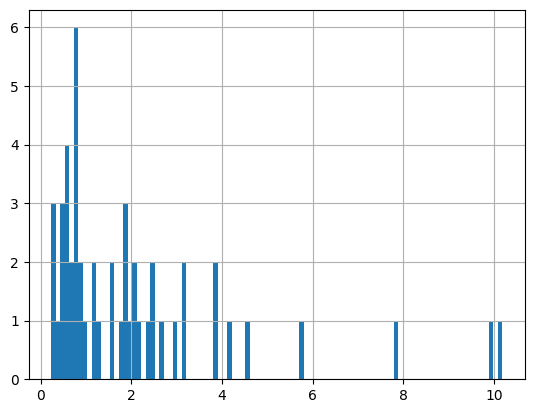

In [15]:
only_variance.hist(bins=100)

In [16]:
print(len(group1), len(group2), len(group3), len(group4), len(group5))
print(sum([len(group1), len(group2), len(group3), len(group4), len(group5)]))

22 13 9 3 3
50


[]

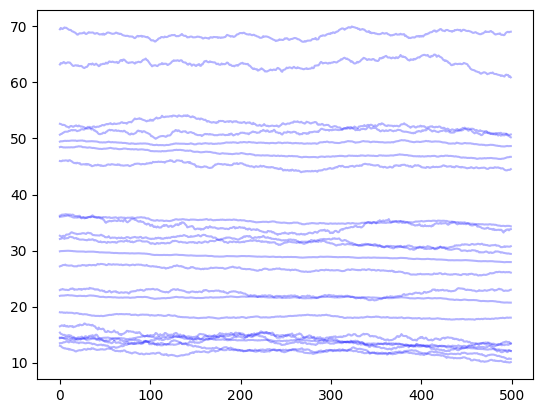

In [17]:
for i in group1:
    plt.plot(data_0_500[i], color='blue', alpha=0.3)
plt.plot()

In [19]:
# Train 5 separate models
data_by_group = [data_scaled_full[group1], data_scaled_full[group2], data_scaled_full[group3], data_scaled_full[group4], data_scaled_full[group5]]

data_train = data_by_group[0][:250].T
data_test = data_by_group[0][250:].T

model1 = Sequential([
    Input(shape=(250, 1)),
    Bidirectional(LSTM(250, return_sequences=True, activation='tanh')),  # Changed to Bidirectional LSTM
    Dropout(0.2),
    LSTM(250, return_sequences=True, activation='tanh'),  # Last LSTM layer might not return sequences
    Dense(1, activation='linear'),  # Ensure output layer has linear activation
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model1.compile(optimizer=optimizer, loss='mean_squared_error')
model1.fit(data_train, data_test, epochs=100, batch_size=32)
model1.summary()

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 1.0882
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 986ms/step - loss: 0.9702
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 986ms/step - loss: 0.9089
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 979ms/step - loss: 0.8795
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 999ms/step - loss: 0.8829
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 998ms/step - loss: 0.8757
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 994ms/step - loss: 0.8576
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 984ms/step - loss: 0.8366
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 988ms/step - loss: 0.8233
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.8187
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.8168
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.8109
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 998ms/step - loss: 0.8021
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.7942
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.7937
Epoch 16/100
1/1 ━━━━━

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 250, 500)       │       504,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 250, 500)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 250, 250)       │       751,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 250, 1)         │           251 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,765,755 (14.37 MB)

 Trainable params: 1,255,251 (4.79 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,510,504 (9.58 MB)

In [24]:
predictions = model1.predict(data_train).squeeze()
predictions_transposed = pd.DataFrame(predictions.T)
print(predictions_transposed.head(2))
print(predictions_transposed.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
         0         1         2         3         4         5         6   \
0  0.455405  0.015410  0.039849  0.000167  0.081382  0.025385  0.011740   
1  0.642049  0.007765  0.050366 -0.014481  0.120025  0.021872  0.002649   

         7         8         9   ...        12        13        14        15  \
0  0.009168  0.006875  0.028205  ...  0.010987  0.164298  0.025233  0.016823   
1 -0.003257 -0.006110  0.026242  ...  0.000141  0.229975  0.020952  0.011872   

         16        17        18        19        20        21  
0  0.017961  0.036637  0.026949  0.014326  0.422789  0.006958  
1  0.010022  0.039270  0.021459  0.006905  0.599621 -0.005824  

[2 rows x 22 columns]
(250, 22)


In [25]:
# Predict
predictions = model1.predict(data_train).squeeze()
predictions_transposed = pd.DataFrame(predictions.T)
predictions_transposed.columns = group1
predictions_transposed.index = [i for i in range(250, 500)]
predictions_transposed.head(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


,0,2,5,6,8,12,14,16,17,18,...,27,28,29,30,38,39,40,42,45,47
250,0.455405,0.015410,0.039849,0.000167,0.081382,0.025385,0.011740,0.009168,0.006875,0.028205,...,0.010987,0.164298,0.025233,0.016823,0.017961,0.036637,0.026949,0.014326,0.422789,0.006958
251,0.642049,0.007765,0.050366,-0.014481,0.120025,0.021872,0.002649,-0.003257,-0.006110,0.026242,...,0.000141,0.229975,0.020952,0.011872,0.010022,0.039270,0.021459,0.006905,0.599621,-0.005824


In [26]:
data_train_t = pd.DataFrame(data_train.T)
compare = pd.concat([data_train_t, predictions_transposed], axis='rows')

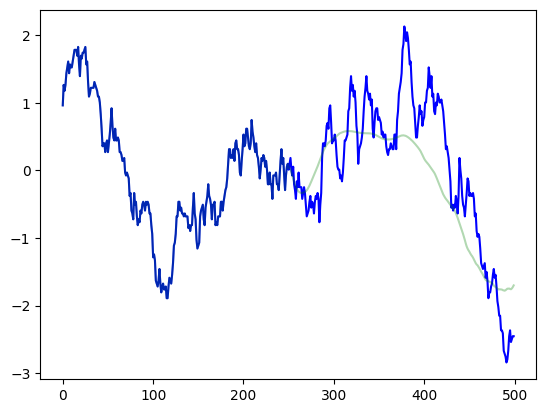

In [27]:
stock_number = 17
plt.plot(data_scaled_full[group1[stock_number]], color='blue', label='Real Stock Price')
plt.plot(compare[group1[stock_number]], color='green', label='Predicted Stock Price', alpha = 0.3)

In [28]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima

In [29]:
stock_number = group1[10]
stock_data = pd.DataFrame(data_0_500[stock_number])

In [30]:
# Add technical indicators
stock_data['SMA_20'] = stock_data[stock_number].rolling(window=20).mean()
stock_data['SMA_50'] = stock_data[stock_number].rolling(window=50).mean()
stock_data['SMA_100'] = stock_data[stock_number].rolling(window=100).mean()
stock_data['RSI'] = 100 - (100 / (1 + (stock_data[stock_number].pct_change(1).rolling(window=14).mean() / 100)))
stock_data['MACD'] = stock_data[stock_number].ewm(span=12, adjust=False).mean() - stock_data[stock_number].ewm(span=26, adjust=False).mean()
stock_data['Signal_Line'] = stock_data['MACD'].ewm(span=9, adjust=False).mean()


<Axes: >

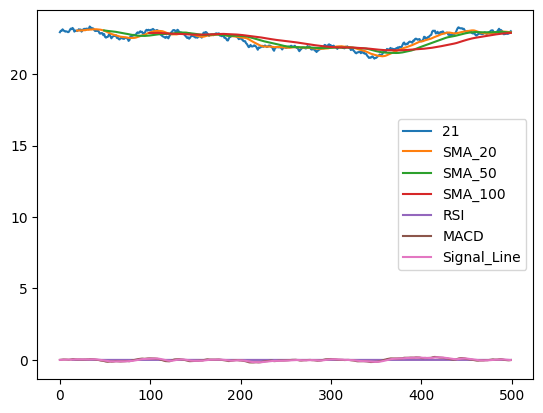

In [31]:
stock_data.plot()

In [32]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Define the ARIMA model
def arima_forecast(history):
    # Fit the model
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit()
    
    # Make the prediction
    output = model_fit.forecast()
    yhat = output[0]
    return yhat


In [38]:
train[21]

0      22.94
1      23.04
2      23.04
3      23.14
4      23.05
       ...  
395    22.45
396    22.41
397    22.44
398    22.46
399    22.31
Name: 21, Length: 400, dtype: float64

In [45]:
predictions

[22.31]

In [48]:
from sklearn.metrics import mean_squared_error
# Split the data
train_size = int(len(stock_data) * 0.8)
train, test = stock_data[0:train_size], stock_data[train_size:]

# Walk-forward validation
history = train[21].values.copy()
predictions = list()
for i in range(len(test)):
    yhat = arima_forecast(history)
    predictions.append(yhat)
    history = np.concatenate([history, test[21].values[i].reshape(1)])


# # Calculate the error
# error = np.sqrt(mean_squared_error(test, predictions))
# print('Test RMSE: %.3f' % error)

# # Plot the predictions
# plt.plot(train.index, train, label='Train')
# plt.plot(test.index, test, label='Test')
# plt.plot(test.index, predictions, label='ARIMA')
# plt.legend()
# plt.show()



d:\Projects\ALGOTHON 2024\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\Projects\ALGOTHON 2024\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\Projects\ALGOTHON 2024\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\Projects\ALGOTHON 2024\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\Projects\ALGOTHON 2024\.venv\Lib\site-packages\statsmodels\base\model

,21,SMA_20,SMA_50,SMA_100,RSI,MACD,Signal_Line
400,22.30,22.2935,21.9236,21.7682,0.000230,0.133208,0.155753
401,22.36,22.3005,21.9468,21.7725,0.000261,0.124656,0.149534
402,22.40,22.3165,21.9698,21.7769,0.000421,0.119727,0.143572
403,22.62,22.3435,21.9958,21.7831,0.001219,0.132050,0.141268
404,22.60,22.3665,22.0202,21.7901,0.001284,0.138605,0.140735
...,...,...,...,...,...,...,...
495,22.82,22.9670,22.9282,22.8687,-0.000057,-0.022327,0.004474
496,22.83,22.9590,22.9216,22.8729,-0.000307,-0.026664,-0.001754
497,22.86,22.9495,22.9152,22.8771,-0.000214,-0.027364,-0.006876
498,22.96,22.9440,22.9130,22.8821,-0.000119,-0.019624,-0.009426


In [1]:
plt.plot(history[:300], label='Train')
plt.plot(train[21], label='Train')
plt.plot(test[21], label='Test')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, predictions, label='ARIMA')
plt.legend()

NameError: name 'plt' is not defined